# Carga del dataset *Chess*

Comenzamos con la carga del dataset *Chess (King-Rook vs. King-Pawn) Data Set* obtenido en *UCI Machine Learning Repository* (https://archive.ics.uci.edu/ml/datasets/Chess+(King-Rook+vs.+King-Pawn)). 

Este dataset describe con cada una de sus instancias la disposición del tablero al final de una partida de ajedrez. La variable objetivo toma los valores "won" si las piezas blancas pueden ganar la partida o "nowin" en caso contrario.

In [1]:
import pandas as pd
import numpy as np

filename = 'kr-vs-kp.csv'
col_names = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq',
             'bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp',
             'dwipd','hdchk','katri','mulch','qxmsq','r2ar8',
             'reskd','reskr','rimmx','rkxwp','rxmsq','simpl',
             'skach','skewr','skrxp','spcop','stlmt','thrsk',
             'wkcti','wkna8','wknck','wkovl','wkpos','wtoeg']
df = pd.read_csv(filename, names = col_names)
print(f'Shape -> {df.shape}')
df.head()

Shape -> (3196, 36)


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
f,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
f,f,f,f,t,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
f,f,f,f,t,f,t,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
f,f,f,f,f,f,f,f,t,f,f,...,f,f,f,f,f,f,t,t,n,won
f,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


Todas las variables de este dataset son variables de tipo categórico. A continuación, vamos a proceder a transformarlas en variables de tipo numérico utilizando *one-hot encoding* proporcionado por ``pandas``.

# Transformación de las variables categóricas

In [2]:
df_oh = pd.get_dummies(df[df.columns[:-1]])
print(f'Shape -> {df_oh.shape}')
df_oh.head()

Shape -> (3196, 71)


,bkblk_f,bkblk_t,bknwy_f,bknwy_t,bkon8_f,bkon8_t,bkona_f,bkona_t,bkspr_f,bkspr_t,...,wkcti_f,wkcti_t,wkna8_f,wkna8_t,wknck_f,wknck_t,wkovl_f,wkovl_t,wkpos_n,wkpos_t
f,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
f,1,0,1,0,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0
f,1,0,1,0,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0
f,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
f,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0


Mediante el paso anterior, hemos transformado todas las variables a formato *one-hot*. Del *output* podemos observar como las 35 variables categóricas se han convertido ahora en 71 variables binarias. Procedemos a continuación a utilizar la clase ``SelectKBest`` y diferentes tipos de estadísticos para seleccionar las caraterísticas con mayor grado de correlación con la variable objetivo.

# Selección de características

Después de la transformación aplicada a las variables de entrada, nos enfrentamos a un problema con **variables de entrada categóricas** y **variable objetivo categórica**, por tanto, se nos plantea el uso del coeficiente *Chi2* o el coeficiente de *información mútua*. 

In [3]:
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

filter_chi = SelectKBest(score_func = chi2, k = 5)
filter_mutual = SelectKBest(score_func = mutual_info_classif, k = 5)

# Obtenemos los modelos
chi_model = filter_chi.fit(df_oh, df['wtoeg'])
mutual_model = filter_mutual.fit(df_oh, df['wtoeg'])

# Mostramos los scores
ser_chi = pd.Series(chi_model.scores_, index = df_oh.columns).sort_values(ascending = False)
print(f'Scores CHI ->\n{ser_chi}\n\n')
ser_mutual = pd.Series(mutual_model.scores_, index = df_oh.columns).sort_values(ascending = False)
print(f'Scores mutual ->\n{ser_mutual}\n\n')

Scores CHI ->
reskr_t    534.312762
blxwp_t    321.461108
wkna8_t    264.702418
wkna8_f    161.703292
blxwp_f    140.287072
              ...    
mulch_f      0.014472
bkblk_f      0.003042
skrxp_f      0.000342
wkpos_t      0.000004
wkpos_n      0.000001
Length: 71, dtype: float64


Scores mutual ->
reskr_t    0.137759
reskr_f    0.128677
wkna8_f    0.077044
blxwp_f    0.075076
wkna8_t    0.074502
             ...   
cntxt_f    0.000000
skrxp_f    0.000000
stlmt_f    0.000000
reskd_f    0.000000
rxmsq_t    0.000000
Length: 71, dtype: float64




# Gráficos para la importancia de las características

Pasamos a continuación a dibujar la puntuación de las características usando la librería ``matplotlib``. Para mayor claridad mostraremos únicamente las 10 características con mayor importancia para ambos casos.

<IPython.core.display.Javascript object>


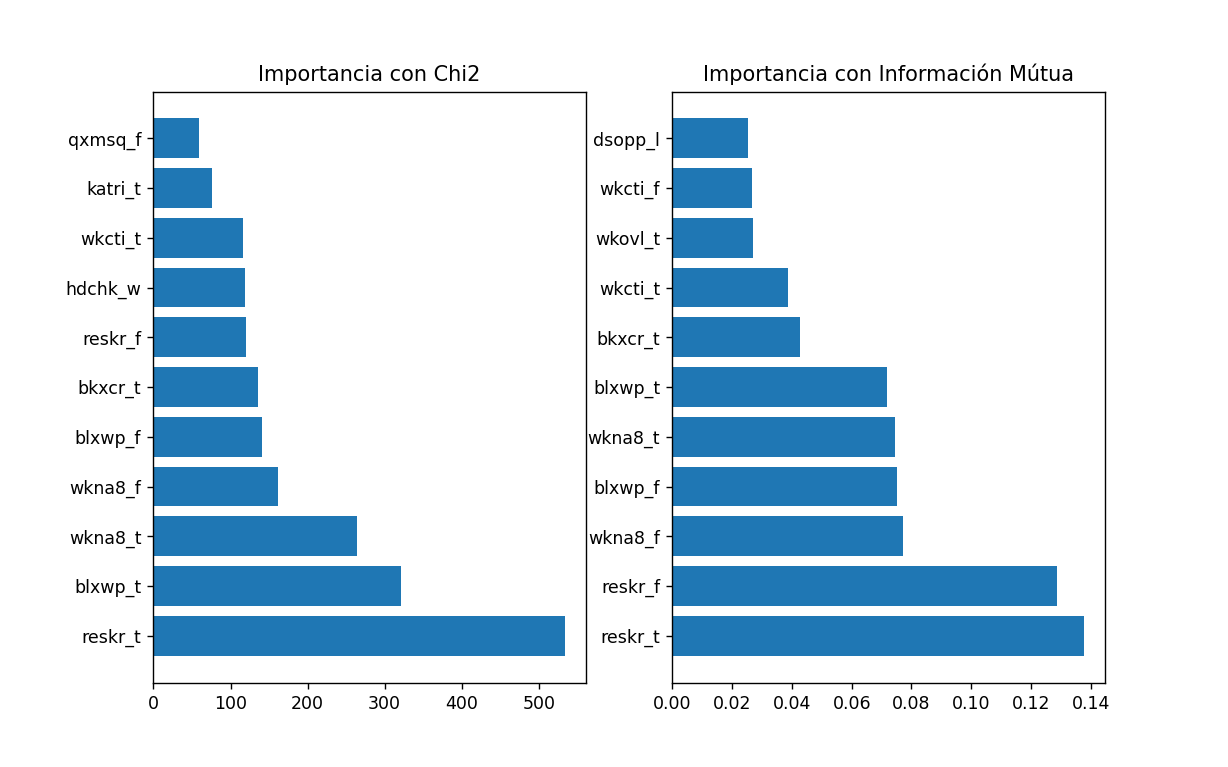

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].set_title('Importancia con Chi2')
ax[1].set_title('Importancia con Información Mútua')
ax[0].barh(ser_chi.index[:11], ser_chi.values[:11])
ax[1].barh(ser_mutual.index[:11], ser_mutual.values[:11])
plt.show()

De estas gráficas se deben mencionar dos aspectos importantes. En primer lugar, al calcular la codificación *one-hot* de las variables categóricas, hemos reemplazado en el DataFrame cierta variable *X* por sus respectivas variables *X_t* y *X_f* (excepto en una de las variables con diferentes valores categóricos). Esto implica que estas nuevas variables generadas deben ser consideradas "en conjunto" para determinar la importancia de una variable. Por ejemplo, según el coeficiente de información mútua las variables ``reskr_t`` y ``reskr_f``, tienen el nivel más alto de "importancia". Estas dos variables representan a la variable ``reskr`` en el DataFrame original. En caso de volver a dicho DataFrame seleccionaríamos la características ``reskr`` para conservarla en las siguientes operaciones sobre el mismo. 

En segundo lugar, vemos que ambos test parecen otorgar el mayor nivel de "improtancia" a las mismas tres variables, ``reskr``, ``blxwp`` y ``wkna8``. En otras palabras, en caso de tener que seleccionar únicamente tres variables de nuestro dataset, ambos métodos terminarían por seleccionar las mismas. 